In [1]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve

from sklearn.metrics import mean_squared_error

import scipy.stats as st
from scipy.stats import randint
from scipy.stats import uniform

import math
import pickle
import itertools
from datetime import datetime

In [2]:
# display setting to show more columns & rows
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 9999
pd.options.display.max_rows = 9999

## Import data

In [29]:
train_table = pd.read_csv("/Users/limengyuan/Downloads/data5002/phase1_training/trajectories_training_phase1_table5.csv")
train_table.head()

intersection_id  tollgate_id  vehicle_id        starting_time  \
0               B            3     1065642  2016-07-19 00:14:24   
1               B            3     1047198  2016-07-19 00:35:56   
2               B            1     1086390  2016-07-19 00:37:15   
3               A            2     1071181  2016-07-19 00:37:59   
4               B            1     1065807  2016-07-19 00:56:21   

                                                                                                                                                                                                travel_seq  \
0                                                       105#2016-07-19 00:14:24#9.56;100#2016-07-19 00:14:34#6.75;111#2016-07-19 00:14:41#13.00;103#2016-07-19 00:14:54#7.47;122#2016-07-19 00:15:02#32.85   
1                                                     105#2016-07-19 00:35:56#11.58;100#2016-07-19 00:36:08#7.44;111#2016-07-19 00:36:15#16.23;103#2016-07-19 00:36:32#5.95;122#2016-07-19 00:36:40#104.79   
2  105#2016-07-19 00:37:15#5.26;100#2016-07-19 00:37:20#2.85;111#2016-07-19 00:37:23#5.94;103#2016-07-19 00:37:29#1.13;116#2016-07-19 00:37:30#10.07;101#2016-07-19 00:37:40#5.27;121#2016-07-19 00:37:...   
3                          110#2016-07-19 00:37:59#13.74;123#2016-07-19 00:38:13#4.70;107#2016-07-19 00:38:17#6.63;108#2016-07-19 00:38:24#4.95;120#2016-07-19 00:38:29#0.74;117#2016-07-19 00:38:30#27.05   
4  105#2016-07-19 00:56:21#16.08;100#2016-07-19 00:56:37#12.34;111#2016-07-19 00:56:49#25.75;103#2016-07-19 00:57:15#4.89;116#2016-07-19 00:57:21#38.30;101#2016-07-19 00:57:59#17.87;121#2016-07-19 00...   

   travel_time  
0        70.85  
1       148.79  
2        79.76  
3        58.05  
4       137.98

In [30]:
test_table = pd.read_csv("/Users/limengyuan/Downloads/data5002/phase1_test/trajectories_test_phase1_table5.csv")
test_table.head()

intersection_id  tollgate_id  vehicle_id        starting_time  \
0               A            2     1026631  2016-10-18 06:00:14   
1               C            3     1017312  2016-10-18 06:00:28   
2               A            2     1044671  2016-10-18 06:03:07   
3               A            3     1000017  2016-10-18 06:04:37   
4               A            2     1002850  2016-10-18 06:10:17   

                                                                                                                                                                                                travel_seq  \
0                            110#2016-10-18 06:00:14#7.65;123#2016-10-18 06:00:22#4.14;107#2016-10-18 06:00:26#2.39;108#2016-10-18 06:00:29#2.81;120#2016-10-18 06:00:31#0.42;117#2016-10-18 06:00:32#9.54   
1  115#2016-10-18 06:00:28#9.35;102#2016-10-18 06:00:38#13.54;109#2016-10-18 06:00:51#4.35;104#2016-10-18 06:00:55#24.96;112#2016-10-18 06:01:20#22.73;111#2016-10-18 06:01:43#16.16;103#2016-10-18 06:...   
2                            110#2016-10-18 06:03:07#7.22;123#2016-10-18 06:03:14#3.91;107#2016-10-18 06:03:18#2.25;108#2016-10-18 06:03:21#2.65;120#2016-10-18 06:03:23#0.40;117#2016-10-18 06:03:24#9.01   
3  110#2016-10-18 06:04:37#7.39;123#2016-10-18 06:04:44#4.00;107#2016-10-18 06:04:48#2.31;108#2016-10-18 06:04:51#2.71;119#2016-10-18 06:04:53#0.61;114#2016-10-18 06:04:54#14.31;118#2016-10-18 06:05:...   
4                          110#2016-10-18 06:10:17#14.33;123#2016-10-18 06:10:31#5.84;107#2016-10-18 06:10:37#3.37;108#2016-10-18 06:10:40#3.96;120#2016-10-18 06:10:44#0.59;117#2016-10-18 06:10:45#43.00   

   travel_time  
0        27.54  
1       139.53  
2        26.01  
3        78.40  
4        71.00

In [31]:
traj_table = pd.concat([train_table, test_table])

In [34]:
train_table.shape

(109244, 6)

In [32]:
traj_table.shape

(111580, 6)

In [5]:
table3 = pd.read_csv("/Users/limengyuan/Downloads/data5002/road/links_table3.csv")
table3.head()

link_id  length  width  lanes in_top  out_top  lane_width
0      100      58      3      1    105      111           3
1      101      84      3      1    116      121           3
2      102     131      9      3    115      109           3
3      103      23     12      4    111  122,116           3
4      104     293      9      3    109      112           3

In [6]:
table4 = pd.read_csv("/Users/limengyuan/Downloads/data5002/road/routes_table 4.csv")
table4

intersection_id  tollgate_id  \
0               A            2   
1               A            3   
2               B            1   
3               B            3   
4               C            1   
5               C            3   

                                          link_seq  
0                          110,123,107,108,120,117  
1                  110,123,107,108,119,114,118,122  
2              105,100,111,103,116,101,121,106,113  
3                              105,100,111,103,122  
4  115,102,109,104,112,111,103,116,101,121,106,113  
5                  115,102,109,104,112,111,103,122

In [10]:
train_table1 = pd.read_csv("/Users/limengyuan/Downloads/data5002/phase1_training/20min_avg_travel_time_training_phase1.csv")

In [12]:
train_table1.shape

(25144, 4)

In [113]:
test_table1 = pd.read_csv("/Users/limengyuan/Downloads/data5002/phase1_test/20min_avg_travel_time_test_phase1.csv")
test_table1.shape

(448, 4)

### Table1: Create New Features-train data

In [35]:
train_table1['tollgate_id'] = train_table1['tollgate_id'].astype('str')
train_table1['route'] = train_table1['intersection_id'] + train_table1['tollgate_id'] 
train_table1['route'].value_counts()

A2    5965
A3    5304
B3    4803
C1    3290
B1    3206
C3    2576
Name: route, dtype: int64

In [36]:
train_table1['avg_travel_time_log'] = train_table1['avg_travel_time'].transform([np.log1p])

In [37]:
train_table1

intersection_id tollgate_id                                time_window  \
0                   B           3  [2016-07-19 00:00:00,2016-07-19 00:20:00)   
1                   B           3  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
2                   B           3  [2016-07-19 01:40:00,2016-07-19 02:00:00)   
3                   B           3  [2016-07-19 02:00:00,2016-07-19 02:20:00)   
4                   B           3  [2016-07-19 02:40:00,2016-07-19 03:00:00)   
5                   B           3  [2016-07-19 03:40:00,2016-07-19 04:00:00)   
6                   B           3  [2016-07-19 04:00:00,2016-07-19 04:20:00)   
7                   B           3  [2016-07-19 04:20:00,2016-07-19 04:40:00)   
8                   B           3  [2016-07-19 04:40:00,2016-07-19 05:00:00)   
9                   B           3  [2016-07-19 05:00:00,2016-07-19 05:20:00)   
10                  B           3  [2016-07-19 06:00:00,2016-07-19 06:20:00)   
11                  B           3  [2016-07-19 06:20:00,2016-07-19 06:40:00)   
12                  B           3  [2016-07-19 06:40:00,2016-07-19 07:00:00)   
13                  B           3  [2016-07-19 07:00:00,2016-07-19 07:20:00)   
14                  B           3  [2016-07-19 07:20:00,2016-07-19 07:40:00)   
15                  B           3  [2016-07-19 07:40:00,2016-07-19 08:00:00)   
16                  B           3  [2016-07-19 08:00:00,2016-07-19 08:20:00)   
17                  B           3  [2016-07-19 08:20:00,2016-07-19 08:40:00)   
18                  B           3  [2016-07-19 08:40:00,2016-07-19 09:00:00)   
19                  B           3  [2016-07-19 09:00:00,2016-07-19 09:20:00)   
20                  B           3  [2016-07-19 09:20:00,2016-07-19 09:40:00)   
21                  B           3  [2016-07-19 09:40:00,2016-07-19 10:00:00)   
22                  B           3  [2016-07-19 10:00:00,2016-07-19 10:20:00)   
23                  B           3  [2016-07-19 10:20:00,2016-07-19 10:40:00)   
24                  B           3  [2016-07-19 10:40:00,2016-07-19 11:00:00)   
25                  B           3  [2016-07-19 11:00:00,2016-07-19 11:20:00)   
26                  B           3  [2016-07-19 11:20:00,2016-07-19 11:40:00)   
27                  B           3  [2016-07-19 11:40:00,2016-07-19 12:00:00)   
28                  B           3  [2016-07-19 12:00:00,2016-07-19 12:20:00)   
29                  B           3  [2016-07-19 12:20:00,2016-07-19 12:40:00)   
30                  B           3  [2016-07-19 12:40:00,2016-07-19 13:00:00)   
31                  B           3  [2016-07-19 13:00:00,2016-07-19 13:20:00)   
32                  B           3  [2016-07-19 13:20:00,2016-07-19 13:40:00)   
33                  B           3  [2016-07-19 13:40:00,2016-07-19 14:00:00)   
34                  B           3  [2016-07-19 14:00:00,2016-07-19 14:20:00)   
35                  B           3  [2016-07-19 14:20:00,2016-07-19 14:40:00)   
36                  B           3  [2016-07-19 14:40:00,2016-07-19 15:00:00)   
37                  B           3  [2016-07-19 15:00:00,2016-07-19 15:20:00)   
38                  B           3  [2016-07-19 15:20:00,2016-07-19 15:40:00)   
39                  B           3  [2016-07-19 15:40:00,2016-07-19 16:00:00)   
40                  B           3  [2016-07-19 16:00:00,2016-07-19 16:20:00)   
41                  B           3  [2016-07-19 16:20:00,2016-07-19 16:40:00)   
42                  B           3  [2016-07-19 16:40:00,2016-07-19 17:00:00)   
43                  B           3  [2016-07-19 17:00:00,2016-07-19 17:20:00)   
44                  B           3  [2016-07-19 17:20:00,2016-07-19 17:40:00)   
45                  B           3  [2016-07-19 17:40:00,2016-07-19 18:00:00)   
46                  B           3  [2016-07-19 18:00:00,2016-07-19 18:20:00)   
47                  B           3  [2016-07-19 18:20:00,2016-07-19 18:40:00)   
48                  B           3  [2016-07-19 18:40:00,2016-07-19 19:00:00)   
49    

In [40]:
train_table1['avg_travel_time'].max()

1514.89

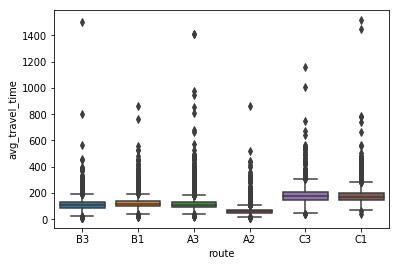

In [41]:
sns.boxplot(x='route', y='avg_travel_time', data=train_table1);

Text(0.5, 0, 'avg_travel_time')

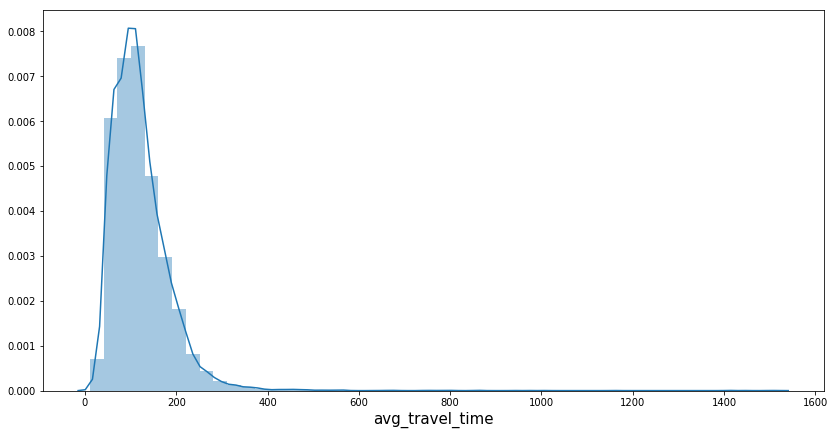

In [46]:
f, ax = plt.subplots(figsize=(14, 7))
#plt.xticks(rotation='45')
sns.distplot(train_table1['avg_travel_time']);
plt.xlabel('avg_travel_time', fontsize=15)

### start_datetime

In [48]:
# extract string between '[' and ','
train_table1['start_datetime'] = train_table1['time_window'].apply(lambda x: x[x.find('[')+1 : x.find(',', x.find('[')+1)])
# convert start_datetime to datetime object
train_table1['start_datetime'] = pd.to_datetime(train_table1['start_datetime'])

In [49]:
train_table1.dtypes

intersection_id                object
tollgate_id                    object
time_window                    object
avg_travel_time               float64
route                          object
avg_travel_time_log           float64
start_datetime         datetime64[ns]
dtype: object

In [51]:
train_table1.head()

intersection_id tollgate_id                                time_window  \
0               B           3  [2016-07-19 00:00:00,2016-07-19 00:20:00)   
1               B           3  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
2               B           3  [2016-07-19 01:40:00,2016-07-19 02:00:00)   
3               B           3  [2016-07-19 02:00:00,2016-07-19 02:20:00)   
4               B           3  [2016-07-19 02:40:00,2016-07-19 03:00:00)   

   avg_travel_time route  avg_travel_time_log      start_datetime  
0            70.85    B3             4.274581 2016-07-19 00:00:00  
1           148.79    B3             5.009234 2016-07-19 00:20:00  
2            93.72    B3             4.550925 2016-07-19 01:40:00  
3            67.81    B3             4.231349 2016-07-19 02:00:00  
4           167.55    B3             5.127232 2016-07-19 02:40:00

### start_hour

In [52]:
train_table1['start_hour'] = train_table1['start_datetime'].dt.hour
train_table1['start_hour'].value_counts()

13    1396
14    1389
12    1380
9     1349
16    1344
15    1340
8     1336
11    1314
10    1310
17    1268
7     1264
18    1209
19    1157
20    1109
6     1084
21    1069
22     900
5      727
23     709
0      605
4      545
1      477
3      447
2      416
Name: start_hour, dtype: int64

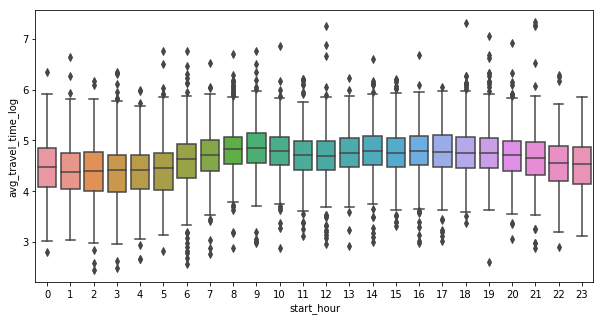

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='start_hour', y='avg_travel_time_log', data=train_table1, ax=ax);

In [54]:
train_table1.head()

intersection_id tollgate_id                                time_window  \
0               B           3  [2016-07-19 00:00:00,2016-07-19 00:20:00)   
1               B           3  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
2               B           3  [2016-07-19 01:40:00,2016-07-19 02:00:00)   
3               B           3  [2016-07-19 02:00:00,2016-07-19 02:20:00)   
4               B           3  [2016-07-19 02:40:00,2016-07-19 03:00:00)   

   avg_travel_time route  avg_travel_time_log      start_datetime  start_hour  
0            70.85    B3             4.274581 2016-07-19 00:00:00           0  
1           148.79    B3             5.009234 2016-07-19 00:20:00           0  
2            93.72    B3             4.550925 2016-07-19 01:40:00           1  
3            67.81    B3             4.231349 2016-07-19 02:00:00           2  
4           167.55    B3             5.127232 2016-07-19 02:40:00           2

### day_of_week

In [55]:
train_table1['day_of_week'] = train_table1['start_datetime'].dt.weekday
train_table1['day_of_week'].value_counts()

5    3675
4    3672
2    3622
3    3610
6    3540
1    3525
0    3500
Name: day_of_week, dtype: int64

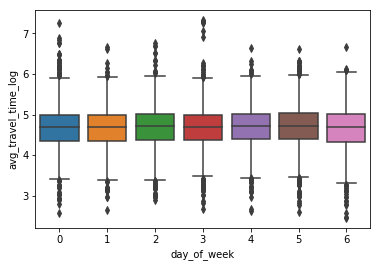

In [58]:
sns.boxplot(x='day_of_week', y='avg_travel_time_log', data=train_table1);

### weekday

In [68]:
# assume dataset is in the context of china
# list out holidays between July to Oct
china_holidays_str = ['2016-09-15','2016-09-16','2016-09-17',
                      '2016-10-01','2016-10-02','2016-10-03',
                      '2016-10-04','2016-10-05','2016-10-06','2016-10-07']
china_workingdays_str = ['2016-09-18', '2016-10-08', '2016-10-09']
china_workingdays = []

for i in range(len(china_workingdays_str)):
    china_workingdays.append(datetime.strptime(china_workingdays_str[i], "%Y-%m-%d"))
    
china_holidays = []
for i in range(len(china_holidays_str)):
    china_holidays.append(datetime.strptime(china_holidays_str[i], "%Y-%m-%d"))

In [73]:
weekday = [0,1,2,3,4]
train_table1['weekday'] = np.where(train_table1['day_of_week'].isin(weekday)|train_table1['start_datetime'].isin(china_workingdays),1,0)
train_table1['weekday'].value_counts()

1    17935
0     7209
Name: weekday, dtype: int64

### holiday

In [70]:
train_table1['holiday'] = np.where(train_table1['start_datetime'].isin(china_holidays),1,0)
train_table1['holiday'].value_counts()

0    25113
1       31
Name: holiday, dtype: int64

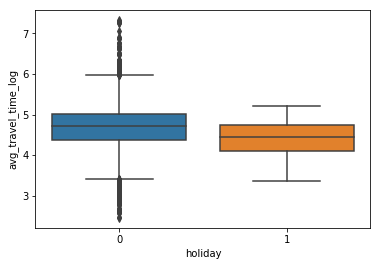

In [71]:
sns.boxplot(x='holiday', y='avg_travel_time_log', data=train_table1);

In [78]:
# Satisfy the following conditions: rush_hr = [8,9,17,18], wkday = [0,1,2,3,4], hol = [0]
# True & True & True = True; and False & False & False = False
# by right, rush hour should not occur on weekends / hols, although the prediction applies "rush hour" to all days of the week
rush_hr = [7,8,9,17,18,19]
wkday = [1]
hol = [0]
train_table1['rush_hour'] = np.where(train_table1['start_hour'].isin(rush_hr) & train_table1['weekday'].isin(wkday) & train_table1['holiday'].isin(hol),1,0)
train_table1['rush_hour'].value_counts()

0    19778
1     5366
Name: rush_hour, dtype: int64

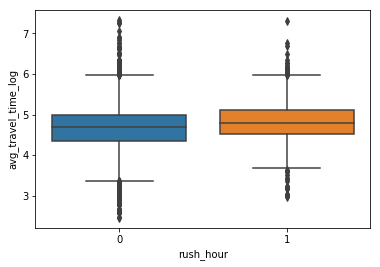

In [77]:
sns.boxplot(x='rush_hour', y='avg_travel_time_log', data=train_table1)

In [100]:
interval_range = pd.interval_range(start=0, freq=2, end=24, closed='left')
interval_range
train_table1['hour_of_day'] = pd.cut(train_table1['start_hour'], bins=interval_range)
train_table1['hour_of_day'].value_counts()

[12, 14)    2776
[14, 16)    2729
[8, 10)     2685
[10, 12)    2624
[16, 18)    2612
[18, 20)    2366
[6, 8)      2348
[20, 22)    2178
[22, 24)    1609
[4, 6)      1272
[0, 2)      1082
[2, 4)       863
Name: hour_of_day, dtype: int64

In [101]:
train_table1.head()

intersection_id tollgate_id                                time_window  \
0                   B           3  [2016-07-19 00:00:00,2016-07-19 00:20:00)   
13313               A           2  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
4803                B           1  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
1                   B           3  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
4804                B           1  [2016-07-19 00:40:00,2016-07-19 01:00:00)   

       avg_travel_time route  avg_travel_time_log      start_datetime  \
0                70.85    B3             4.274581 2016-07-19 00:00:00   
13313            58.05    A2             4.078385 2016-07-19 00:20:00   
4803             79.76    B1             4.391482 2016-07-19 00:20:00   
1               148.79    B3             5.009234 2016-07-19 00:20:00   
4804            137.98    B1             4.934330 2016-07-19 00:40:00   

       start_hour  day_of_week  weekday  holiday  rush_hour hour_of_day  
0               0            1        1        0          0      [0, 2)  
13313           0            1        1        0          0      [0, 2)  
4803            0            1        1        0          0      [0, 2)  
1               0            1        1        0          0      [0, 2)  
4804            0            1        1        0          0      [0, 2)

In [102]:
train_table2 = pd.read_csv("/Users/limengyuan/Downloads/data5002/weather/weather_July_01_Oct_17_table7.csv")
train_table2.head()

date  hour  pressure  sea_pressure  wind_direction  wind_speed  \
0  2016-07-01     0    1000.4        1005.3           225.0         2.1   
1  2016-07-01     3    1000.5        1005.3           187.0         2.7   
2  2016-07-01     6     998.9        1003.7           212.0         2.9   
3  2016-07-01     9     998.7        1003.5           244.0         2.7   
4  2016-07-01    12     999.7        1004.5           222.0         1.3   

   temperature  rel_humidity  precipitation  
0         26.4          94.0            0.0  
1         29.0          76.0            0.0  
2         31.7          67.0            0.0  
3         31.6          59.0            0.0  
4         29.9          68.0            0.0

In [103]:
train_table2.dtypes

date               object
hour                int64
pressure          float64
sea_pressure      float64
wind_direction    float64
wind_speed        float64
temperature       float64
rel_humidity      float64
precipitation     float64
dtype: object

In [104]:
# convert hour into str
train_table2['hour'] = train_table2['hour'].astype('str')

In [105]:
# combine date (str) + hour (str) into datetime (str)
# combine date+time into 1 field because asof merge cannot perform on multiple keys
train_table2['datetime'] = train_table2['date'] + ' ' + train_table2['hour']
# convert datetime (str) into datetime object (note: format is not this '%Y-%m-%d %H:%M:%S')
train_table2['datetime'] = train_table2['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H'))

In [106]:
train_table2.head()

date hour  pressure  sea_pressure  wind_direction  wind_speed  \
0  2016-07-01    0    1000.4        1005.3           225.0         2.1   
1  2016-07-01    3    1000.5        1005.3           187.0         2.7   
2  2016-07-01    6     998.9        1003.7           212.0         2.9   
3  2016-07-01    9     998.7        1003.5           244.0         2.7   
4  2016-07-01   12     999.7        1004.5           222.0         1.3   

   temperature  rel_humidity  precipitation            datetime  
0         26.4          94.0            0.0 2016-07-01 00:00:00  
1         29.0          76.0            0.0 2016-07-01 03:00:00  
2         31.7          67.0            0.0 2016-07-01 06:00:00  
3         31.6          59.0            0.0 2016-07-01 09:00:00  
4         29.9          68.0            0.0 2016-07-01 12:00:00

In [107]:
train_table1.head()

intersection_id tollgate_id                                time_window  \
0                   B           3  [2016-07-19 00:00:00,2016-07-19 00:20:00)   
13313               A           2  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
4803                B           1  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
1                   B           3  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
4804                B           1  [2016-07-19 00:40:00,2016-07-19 01:00:00)   

       avg_travel_time route  avg_travel_time_log      start_datetime  \
0                70.85    B3             4.274581 2016-07-19 00:00:00   
13313            58.05    A2             4.078385 2016-07-19 00:20:00   
4803             79.76    B1             4.391482 2016-07-19 00:20:00   
1               148.79    B3             5.009234 2016-07-19 00:20:00   
4804            137.98    B1             4.934330 2016-07-19 00:40:00   

       start_hour  day_of_week  weekday  holiday  rush_hour hour_of_day  
0               0            1        1        0          0      [0, 2)  
13313           0            1        1        0          0      [0, 2)  
4803            0            1        1        0          0      [0, 2)  
1               0            1        1        0          0      [0, 2)  
4804            0            1        1        0          0      [0, 2)

In [108]:
train_table1.shape

(25144, 13)

In [109]:
train_table2.shape

(862, 10)

In [110]:
# sort
train_table1.sort_values(by=['start_datetime'], inplace=True)
# sort
train_table2.sort_values(by=['datetime'], inplace=True)
# pandas asof merge: similar to a left-join except that we match on nearest key rather than equal keys.
# Both DataFrames must be sorted by the key.
# allow_exact_matches: bool, default True
# direction: ‘backward’ (default), ‘forward’, or ‘nearest’

# train_table1['start_datetime'] is at every 20min interval, whereas train_table7['datetime'] is at 3-hourly interval
# train_table1['start_datetime']: 0h, 1h, 2h -> map to train_table7['datetime']: 0h
# train_table1['start_datetime']: 3h, 4h, 5h -> map to train_table7['datetime']: 3h 
# this assumes that the weather within every 3hourly interval remains the same.

train = pd.merge_asof(train_table1, 
                      train_table2, 
                      left_on=['start_datetime'], 
                      right_on=['datetime'])

In [111]:
train.shape

(25144, 23)

In [112]:
train.head()

intersection_id tollgate_id                                time_window  \
0               B           3  [2016-07-19 00:00:00,2016-07-19 00:20:00)   
1               A           2  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
2               B           1  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
3               B           3  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
4               B           1  [2016-07-19 00:40:00,2016-07-19 01:00:00)   

   avg_travel_time route  avg_travel_time_log      start_datetime  start_hour  \
0            70.85    B3             4.274581 2016-07-19 00:00:00           0   
1            58.05    A2             4.078385 2016-07-19 00:20:00           0   
2            79.76    B1             4.391482 2016-07-19 00:20:00           0   
3           148.79    B3             5.009234 2016-07-19 00:20:00           0   
4           137.98    B1             4.934330 2016-07-19 00:40:00           0   

   day_of_week  weekday  holiday  rush_hour hour_of_day        date hour  \
0            1        1        0          0      [0, 2)  2016-07-19    0   
1            1        1        0          0      [0, 2)  2016-07-19    0   
2            1        1        0          0      [0, 2)  2016-07-19    0   
3            1        1        0          0      [0, 2)  2016-07-19    0   
4            1        1        0          0      [0, 2)  2016-07-19    0   

   pressure  sea_pressure  wind_direction  wind_speed  temperature  \
0    1000.9        1005.8           219.0         3.3         27.5   
1    1000.9        1005.8           219.0         3.3         27.5   
2    1000.9        1005.8           219.0         3.3         27.5   
3    1000.9        1005.8           219.0         3.3         27.5   
4    1000.9        1005.8           219.0         3.3         27.5   

   rel_humidity  precipitation   datetime  
0          81.0            0.0 2016-07-19  
1          81.0            0.0 2016-07-19  
2          81.0            0.0 2016-07-19  
3          81.0            0.0 2016-07-19  
4          81.0            0.0 2016-07-19

### Table1: Create New Features-test data

In [114]:
test_table1['tollgate_id'] = test_table1['tollgate_id'].astype('str')
test_table1['route'] = test_table1['intersection_id'] + test_table1['tollgate_id'] 
test_table1['route'].value_counts()

A3    84
A2    83
B3    77
B1    75
C1    69
C3    60
Name: route, dtype: int64

In [115]:
# extract string between '[' and ','
test_table1['start_datetime'] = test_table1['time_window'].apply(lambda x: x[x.find('[')+1 : x.find(',', x.find('[')+1)])
# convert start_datetime to datetime object
test_table1['start_datetime'] = pd.to_datetime(test_table1['start_datetime'])

In [116]:
test_table1['start_hour'] = test_table1['start_datetime'].dt.hour
test_table1['start_hour'].value_counts()

15    124
16    123
7     108
6      93
Name: start_hour, dtype: int64

In [117]:
test_table1['day_of_week'] = test_table1['start_datetime'].dt.weekday
test_table1['day_of_week'].value_counts()

1    67
0    66
4    64
3    64
6    63
5    62
2    62
Name: day_of_week, dtype: int64

In [118]:
# assume dataset is in the context of china
# list out holidays between July to Oct
china_holidays_str = ['2016-09-15','2016-09-16','2016-09-17',
                      '2016-10-01','2016-10-02','2016-10-03',
                      '2016-10-04','2016-10-05','2016-10-06','2016-10-07']
china_workingdays_str = ['2016-09-18', '2016-10-08', '2016-10-09']
china_workingdays = []

for i in range(len(china_workingdays_str)):
    china_workingdays.append(datetime.strptime(china_workingdays_str[i], "%Y-%m-%d"))
    
china_holidays = []
for i in range(len(china_holidays_str)):
    china_holidays.append(datetime.strptime(china_holidays_str[i], "%Y-%m-%d"))

In [120]:
weekday = [0,1,2,3,4]
test_table1['weekday'] = np.where(test_table1['day_of_week'].isin(weekday)|test_table1['start_datetime'].isin(china_workingdays),1,0)
test_table1['weekday'].value_counts()

1    323
0    125
Name: weekday, dtype: int64

In [121]:
test_table1['holiday'] = np.where(test_table1['start_datetime'].isin(china_holidays),1,0)
test_table1['holiday'].value_counts()

0    448
Name: holiday, dtype: int64

In [122]:
# Satisfy the following conditions: rush_hr = [8,9,17,18], wkday = [0,1,2,3,4], hol = [0]
# True & True & True = True; and False & False & False = False
# by right, rush hour should not occur on weekends / hols, although the prediction applies "rush hour" to all days of the week
rush_hr = [7,8,9,17,18,19]
wkday = [1]
hol = [0]
test_table1['rush_hour'] = np.where(test_table1['start_hour'].isin(rush_hr) & test_table1['weekday'].isin(wkday) & test_table1['holiday'].isin(hol),1,0)
test_table1['rush_hour'].value_counts()

0    371
1     77
Name: rush_hour, dtype: int64

In [123]:
interval_range = pd.interval_range(start=0, freq=2, end=24, closed='left')
interval_range
test_table1['hour_of_day'] = pd.cut(test_table1['start_hour'], bins=interval_range)
test_table1['hour_of_day'].value_counts()

[6, 8)      201
[14, 16)    124
[16, 18)    123
[22, 24)      0
[20, 22)      0
[18, 20)      0
[12, 14)      0
[10, 12)      0
[8, 10)       0
[4, 6)        0
[2, 4)        0
[0, 2)        0
Name: hour_of_day, dtype: int64

In [124]:
test_table2 = pd.read_csv("/Users/limengyuan/Downloads/data5002/weather/weather_Oct_18_Oct_24_table7.csv")
test_table2.head()

date  hour  pressure  sea_pressure  wind_direction  wind_speed  \
0  2016-10-18     0    1015.2        1020.3            62.0         2.1   
1  2016-10-18     3    1014.5        1019.5            37.0         2.5   
2  2016-10-18     6    1012.5        1017.5           128.0         1.6   
3  2016-10-18     9    1013.0        1018.0           205.0         0.6   
4  2016-10-18    12    1013.8        1018.8           106.0         1.5   

   temperature  rel_humidity  precipitation  
0         20.5          87.0            0.0  
1         23.3          73.0            0.0  
2         23.4          73.0            0.0  
3         20.9          94.0            1.8  
4         20.5          94.0            0.5

In [125]:
# convert hour into str
test_table2['hour'] = test_table2['hour'].astype('str')

In [126]:
# combine date (str) + hour (str) into datetime (str)
# combine date+time into 1 field because asof merge cannot perform on multiple keys
test_table2['datetime'] = test_table2['date'] + ' ' + test_table2['hour']
# convert datetime (str) into datetime object (note: format is not this '%Y-%m-%d %H:%M:%S')
test_table2['datetime'] = test_table2['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H'))

In [127]:
# sort
test_table1.sort_values(by=['start_datetime'], inplace=True)
# sort
test_table2.sort_values(by=['datetime'], inplace=True)
# pandas asof merge: similar to a left-join except that we match on nearest key rather than equal keys.
# Both DataFrames must be sorted by the key.
# allow_exact_matches: bool, default True
# direction: ‘backward’ (default), ‘forward’, or ‘nearest’
test = pd.merge_asof(test_table1, 
                      test_table2, 
                      left_on=['start_datetime'], 
                      right_on=['datetime'])

In [129]:
test.shape

(448, 22)

In [133]:
train_table1.head()

intersection_id tollgate_id                                time_window  \
0                   B           3  [2016-07-19 00:00:00,2016-07-19 00:20:00)   
13313               A           2  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
4803                B           1  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
1                   B           3  [2016-07-19 00:20:00,2016-07-19 00:40:00)   
4804                B           1  [2016-07-19 00:40:00,2016-07-19 01:00:00)   

       avg_travel_time route  avg_travel_time_log      start_datetime  \
0                70.85    B3             4.274581 2016-07-19 00:00:00   
13313            58.05    A2             4.078385 2016-07-19 00:20:00   
4803             79.76    B1             4.391482 2016-07-19 00:20:00   
1               148.79    B3             5.009234 2016-07-19 00:20:00   
4804            137.98    B1             4.934330 2016-07-19 00:40:00   

       start_hour  day_of_week  weekday  holiday  rush_hour hour_of_day  
0               0            1        1        0          0      [0, 2)  
13313           0            1        1        0          0      [0, 2)  
4803            0            1        1        0          0      [0, 2)  
1               0            1        1        0          0      [0, 2)  
4804            0            1        1        0          0      [0, 2)

In [132]:
test_table1.head()

intersection_id tollgate_id                                time_window  \
0                 B           3  [2016-10-18 06:00:00,2016-10-18 06:20:00)   
319               C           3  [2016-10-18 06:00:00,2016-10-18 06:20:00)   
236               A           2  [2016-10-18 06:00:00,2016-10-18 06:20:00)   
152               A           3  [2016-10-18 06:00:00,2016-10-18 06:20:00)   
77                B           1  [2016-10-18 06:00:00,2016-10-18 06:20:00)   

     avg_travel_time route      start_datetime  start_hour  day_of_week  \
0                NaN    B3 2016-10-18 06:00:00           6            1   
319              NaN    C3 2016-10-18 06:00:00           6            1   
236              NaN    A2 2016-10-18 06:00:00           6            1   
152              NaN    A3 2016-10-18 06:00:00           6            1   
77               NaN    B1 2016-10-18 06:00:00           6            1   

     weekday  holiday  rush_hour hour_of_day  
0          1        0          0      [6, 8)  
319        1        0          0      [6, 8)  
236        1        0          0      [6, 8)  
152        1        0          0      [6, 8)  
77         1        0          0      [6, 8)

In [131]:
test_table2.shape

(56, 10)

In [ ]:
test.head